<center>
    <h1> Programación Científica</h1>
    <h2> Cellular Automaton: Conway's Game of Life </h2>
    <h2> Felipe Chacón Ossa </h2>
    <h2> 201303017-3 </h2>
</center>

_Julio 2017_

# Implementación

Reglas

* Sobrepoblación: Si una célula viva es rodeada por más de tres células vivas, muere.
* Estasis: Si una célula viva es rodeada por dos o tres células vivas, sobrevive.
* Subpoblación: Si una célula viva es rodeada por menos de dos células vivas, muere.
* Reproduction: Si una célula muerta es rodeada por exáctamente tres células vivas, esta se vuelve una célula viva.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from ipywidgets import interact
from ipywidgets import fixed
import numba
%load_ext line_profiler
%matplotlib inline

In [2]:
def search(cells, row, col):
    Nx = cells.shape[0]
    Ny = cells.shape[1]
    alive = 0
    limIzq = limSup = -1
    limDer = limInf = 2
    
    #Condiciones de borde
    if row == 0:
        limIzq = 0
    if col == 0:
        limSup = 0
    if row == Nx-1:
        limDer = 1
    if col == Ny-1:
        limInf = 1

    #Búsqueda en la vecindad de la célula
    for i in range(limIzq,limDer):
        for j in range(limSup,limInf):
            if (i,j) != (0,0):
                if cells[row+i][col+j] == 1:
                    alive+=1;
    return(alive)

In [3]:
def iteration(original, iterations):
    
    #Primera llamada a la función
    if len(solutions) == 0:
        solutions.append(original)
        
    #Último estado    
    newCells = solutions[-1]
    
    #Creación de un espacio sin células
    newGeneration = np.zeros(newCells.shape, dtype=np.int)
    
    #Si no se ha realizado la iteración
    if len(solutions) <= iterations:
        for k in range(len(solutions)-1, iterations):
            for i in range(0, newCells.shape[0]):
                for j in range(0, newCells.shape[1]):
                    q = search(newCells, i, j)
                    if newCells[i][j] == 1:
                        if q > 3:
                            newGeneration[i][j] = 0
                        elif q < 2:
                            newGeneration[i][j] = 0
                        else:
                            newGeneration[i][j] = 1
                    else:
                        if q == 3:
                            newGeneration[i][j] = 1
            solutions.append(newGeneration)
            newCells = solutions[-1]
            newGeneration = np.zeros(newCells.shape, dtype=np.int)
        return(newCells)
    
    #Si la iteración ya fue realizada anteriormente
    else:
        return solutions[iterations]


In [4]:
@numba.jit
def numbaSearch(cells, row, col):
    Nx = cells.shape[0]
    Ny = cells.shape[1]
    alive = 0
    limIzq = limSup = -1
    limDer = limInf = 2
    
    #Condiciones de borde
    if row == 0:
        limIzq = 0
    if col == 0:
        limSup = 0
    if row == Nx-1:
        limDer = 1
    if col == Ny-1:
        limInf = 1

    #Búsqueda en la vecindad de la célula
    for i in range(limIzq,limDer):
        for j in range(limSup,limInf):
            if (i,j) != (0,0):
                if cells[row+i][col+j] == 1:
                    alive+=1;
    return(alive)

In [5]:
def numbaIteration(original, iterations):
    
    #Primera llamada a la función
    if len(solutions) == 0:
        solutions.append(original)
        
    #Último estado    
    newCells = solutions[-1]
    
    #Creación de un espacio sin células
    newGeneration = np.zeros(newCells.shape, dtype=np.int)
    
    #Si no se ha realizado la iteración
    if len(solutions) <= iterations:
        for k in range(len(solutions)-1, iterations):
            for i in range(0, newCells.shape[0]):
                for j in range(0, newCells.shape[1]):
                    q = numbaSearch(newCells, i, j)
                    if newCells[i][j] == 1:
                        if q > 3:
                            newGeneration[i][j] = 0
                        elif q < 2:
                            newGeneration[i][j] = 0
                        else:
                            newGeneration[i][j] = 1
                    else:
                        if q == 3:
                            newGeneration[i][j] = 1
            solutions.append(newGeneration)
            newCells = solutions[-1]
            newGeneration = np.zeros(newCells.shape, dtype=np.int)
        return(newCells)
    
    #Si la iteración ya fue realizada anteriormente
    else:
        return solutions[iterations]

# Profiling

In [8]:
N = 500
cells = np.random.randint(2, size =(N,N))
solutions = []

In [9]:
%%timeit
solutions = []
iteration(cells, 10)

The slowest run took 420804.15 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 41.2 µs per loop


In [10]:
%%timeit
solutions = []
numbaIteration(cells, 10)

10000 loops, best of 3: 66.9 µs per loop


In [11]:
%%timeit
solutions = []
iteration(cells, 100)

The slowest run took 1929749.28 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 79 µs per loop


In [12]:
%%timeit
solutions = []
numbaIteration(cells, 100)

10000 loops, best of 3: 71.2 µs per loop


Profiling sin numba

In [13]:
solutions = []

In [14]:
%%prun -s cumulative -q -l 15 -T prun0
iteration(cells, 100)

 
*** Profile printout saved to text file 'prun0'. 


In [15]:
print(open('prun0', 'r').read())

         25000209 function calls in 179.860 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000  179.860  179.860 {built-in method builtins.exec}
        1    0.000    0.000  179.859  179.859 <string>:2(<module>)
        1   17.849   17.849  179.859  179.859 <ipython-input-3-f7f9fbc11614>:1(iteration)
 25000000  162.004    0.000  162.004    0.000 <ipython-input-2-a7785eb91a37>:1(search)
      101    0.007    0.000    0.007    0.000 {built-in method numpy.core.multiarray.zeros}
      101    0.000    0.000    0.000    0.000 {method 'append' of 'list' objects}
        3    0.000    0.000    0.000    0.000 {built-in method builtins.len}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


In [16]:
solutions = []

In [17]:
%lprun -T lprof0 -f iteration iteration(cells, 100)


*** Profile printout saved to text file 'lprof0'. 


In [18]:
print(open('lprof0', 'r').read())

Timer unit: 1e-06 s

Total time: 492.803 s
File: <ipython-input-3-f7f9fbc11614>
Function: iteration at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def iteration(original, iterations):
     2                                               
     3                                               #Primera llamada a la función
     4         1            6      6.0      0.0      if len(solutions) == 0:
     5         1            4      4.0      0.0          solutions.append(original)
     6                                                   
     7                                               #Último estado    
     8         1            3      3.0      0.0      newCells = solutions[-1]
     9                                               
    10                                               #Creación de un espacio sin células
    11         1          341    341.0      0.0      newGeneration = np.zeros(newCells.shap

La función 'search' es la que utiliza la mayor cantidad de tiempo, por lo que, para optimizar la función 'iteration', debemos optimizar 'search'. Simplemente se agregó el decorador de numba, en el caso de que no baste para mejorar el desempeño, se agregarán más detalles.

Profiling con numba

In [19]:
solutions = []

In [20]:
%%prun -s cumulative -q -l 15 -T prun0
numbaIteration(cells, 100)

 
*** Profile printout saved to text file 'prun0'. 


In [21]:
print(open('prun0', 'r').read())

         25179310 function calls (25170179 primitive calls) in 65.729 seconds

   Ordered by: cumulative time
   List reduced from 2067 to 15 due to restriction <15>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     52/1    0.001    0.000   65.729   65.729 {built-in method builtins.exec}
        1    0.000    0.000   65.729   65.729 <string>:2(<module>)
        1   57.183   57.183   65.729   65.729 <ipython-input-5-bbc0688cd8de>:1(numbaIteration)
 25000000    8.331    0.000    8.331    0.000 <ipython-input-4-97e136cd63a1>:1(numbaSearch)
        1    0.000    0.000    0.209    0.209 dispatcher.py:273(_compile_for_args)
        1    0.000    0.000    0.209    0.209 dispatcher.py:510(compile)
        1    0.000    0.000    0.209    0.209 dispatcher.py:71(compile)
        1    0.000    0.000    0.209    0.209 compiler.py:683(compile_extra)
        1    0.000    0.000    0.134    0.134 compiler.py:335(compile_extra)
        1    0.000    0.000    0.134    0.134 c

In [26]:
solutions = []

In [27]:
%lprun -T lprof0 -f numbaIteration numbaIteration(cells, 100)


*** Profile printout saved to text file 'lprof0'. 


In [28]:
print(open('lprof0', 'r').read())

Timer unit: 1e-06 s

Total time: 88.1595 s
File: <ipython-input-5-bbc0688cd8de>
Function: numbaIteration at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def numbaIteration(original, iterations):
     2                                               
     3                                               #Primera llamada a la función
     4         1            3      3.0      0.0      if len(solutions) == 0:
     5         1            2      2.0      0.0          solutions.append(original)
     6                                                   
     7                                               #Último estado    
     8         1            1      1.0      0.0      newCells = solutions[-1]
     9                                               
    10                                               #Creación de un espacio sin células
    11         1          349    349.0      0.0      newGeneration = np.zeros(new

De 492 segundos bajó a casi 90, la mejora es lo suficientemente buena como para seguir con la visualización del Juego de la Vida.

# Visualización

In [29]:
def visualization(original, it):
    cells = numbaIteration(original, it)
    fig = plt.figure(figsize=(6, 6), dpi=100)
    plt.imshow(cells, interpolation=None, cmap='inferno')
    plt.show()

In [30]:
cellsDic = dict()

In [31]:
#Interesting patterns
aux = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0],
                [0,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]], np.int)
cellsDic["forever"] = aux
cellsDic["pulsar"] = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                               [0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0],
                               [0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0],
                               [0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0],
                               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                               [0,1,1,1,0,0,1,1,0,1,1,0,0,1,1,1,0],
                               [0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0],
                               [0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0],
                               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                               [0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0],
                               [0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0],
                               [0,1,1,1,0,0,1,1,0,1,1,0,0,1,1,1,0],
                               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                               [0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0],
                               [0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0],
                               [0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0],
                               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]], np.int)
aux = np.zeros(shape=(20,20), dtype=int)
aux[1][1] = aux[1][3] = aux[2][2] = aux[2][3] = aux[3][2] = 1

cellsDic["spaceship"] = aux

A continuación, hay un ejemplo donde un número aleatorio de células se encuentran en una caja de 500x500, se puede observar como se comportan en cada iteración que se realiza.

In [32]:
N = 500
cellsDic["random"] = np.random.randint(2, size =(N,N))

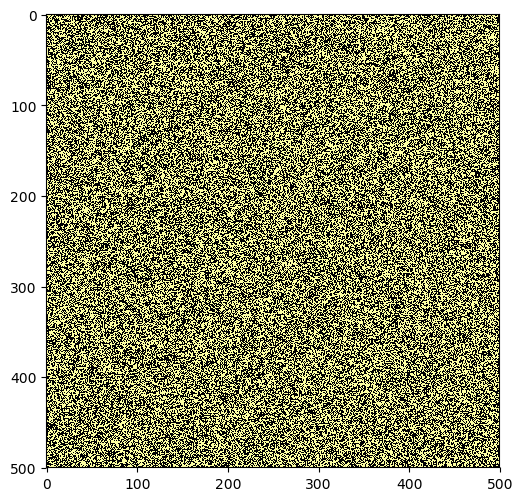

In [36]:
solutions=[]
interact(visualization, original=fixed(cellsDic["random"]), it = (0,100,1))

En un comienzo, se observa que gran parte del espacio se encuentra utilizado por las células, las que rápidamente mueren, posiblemente por sobrepolación, decantando en un estado más estable de interacción.

Existen patrones que son estáticos y que no variarán en el tiempo. Algunos ejemplos son los que se muestran a continuación.

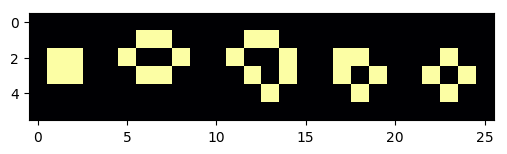

<function __main__.visualization>

In [34]:
solutions=[]
interact(visualization, original=fixed(cellsDic["forever"]), it = (0,100,1))

Además, hay patrones que simulan objetos, como una nave espacial que se mueve en el espacio, patrón que va alternando entre su forma original y otras utilizadas para desplazarse a medida que se mueve en el espacio.

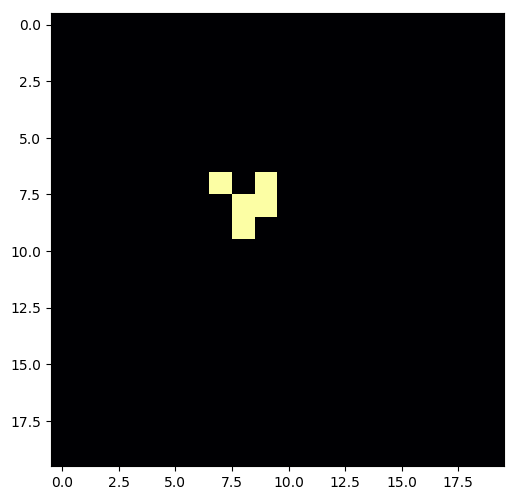

In [35]:
solutions=[]
interact(visualization, original=fixed(cellsDic["spaceship"]), it = (0,100,1))